# Проект спринта 7: Развитие игровой индустрии 2000-2013 год.

- Автор: Смирнов Александр Викторович 
- Дата: 23.02.2025

### Цели и задачи проекта

<font color='#777778'> Мы будем работать с историческими данными, которые коллеги собрали из открытых источников. В них есть информация о продажах игр, сделанных в разных жанрах и выпущенных на разных платформах, а также пользовательские и экспертные оценки игр.

Наша задача — познакомиться с данными, проверить их корректность и провести предобработку, получив необходимый срез данных.
Перед анализом необходимо дополнительно сделать следующее:
- Отобрать данные по времени выхода игры. Вам нужен период с 2000 по 2013 год включительно.
- Категоризовать игры по оценкам пользователей и экспертов. Выделите три категории:
  - высокая оценка — с оценкой от 8 до 10 и от 80 до 100, включая правые границы интервалов.
  - средняя оценка — с оценкой от 3 до 8 и от 30 до 80, не включая правые границы интервалов.
  - низкая оценка — с оценкой от 0 до 3 и от 0 до 30, не включая правые границы интервалов.
- Выделить топ-7 платформ по количеству игр, выпущенных за весь требуемый период.</font>

### Описание данных

<font color='#777778'>Данные содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр:
- Name — название игры.
- Platform — название платформы.
- Year of Release — год выпуска игры.
- Genre — жанр игры.
- NA sales — продажи в Северной Америке (в миллионах проданных копий).
- EU sales — продажи в Европе (в миллионах проданных копий).
- JP sales — продажи в Японии (в миллионах проданных копий).
- Other sales — продажи в других странах (в миллионах проданных копий).
- Critic Score — оценка критиков (от 0 до 100).
- User Score — оценка пользователей (от 0 до 10).
- Rating — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</font>

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.

1. Загрузка и знакомство с данными
2. Проверка ошибок в данных и их предобработка
- Типы данных
- Пропуски в данных
- Дубликаты в данных
3. Фильтрация данных
4. Категоризация данных
- Оценки пользователей
- Оценки критиков
5. Топ-7 платформ. Выделите семь ведущих платформ по числу выпущенных игр за выбранный период. </font>

## 1. Загрузка данных и знакомство с ними

- Загрузите необходимые библиотеки Python и данные датасета `Датасет удален`.


In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Глянем на данные
df.head(5)

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Познакомьтесь с данными: выведите первые строки и результат метода `info()`.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


- Сделайте вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли они описанию, встречаются ли в них пропуски, используются ли верные типы данных.
- Отметьте другие особенности данных, которые вы обнаружили и на которые стоит обратить внимание при предобработке. Например, вы можете проверить названия столбцов: все ли названия отражают содержимое данных и прописаны в удобном для работы виде.

<font color='#777778'>В предоставленных данных, всего 16956 строк и 10 столбцов, которые соответствуют описанию. Данные весят всего 1.4+ MB, также в них имеются пропуски. Больше всего пропусков в столбцах: Critic Score, User Score, Rating и совсем немного пропусков Year of Release, Genre.
- Year of Release, тип можно изменить, float64 не подходит для даты.
- EU sales и JP sales, а также User Score, нужно изменить тип на float64.

В остальном все в порядке, названия отражают содержимое данных, но лучше их исправить в змеиный регистр.</font>

---

## 2.  Проверка ошибок в данных и их предобработка


### 2.1. Названия, или метки, столбцов датафрейма

- Выведите на экран названия всех столбцов датафрейма и проверьте их стиль написания.
- Приведите все столбцы к стилю snake case. Названия должны быть в нижнем регистре, а вместо пробелов — подчёркивания.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')

In [6]:
new_colums = {'Name': 'name', 'Platform': 'platform', 'Year of Release': 'year_of_release', 'Genre': 'genre', 'NA sales': 'NA_sales', 'EU sales': 'EU_sales','JP sales': 'JP_sales', 'Other sales': 'other_sales', 'Critic Score': 'critic_score', 'User Score': 'user_score', 'Rating': 'rating'}

In [7]:
df = df.rename(columns= new_colums)

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Можно еще `df.columns = df.columns.str.lower().str.replace(' ', '_')`

### 2.2. Типы данных

- Если встречаются некорректные типы данных, предположите их причины.
- При необходимости проведите преобразование типов данных. Помните, что столбцы с числовыми данными и пропусками нельзя преобразовать к типу `int64`. Сначала вам понадобится обработать пропуски, а затем преобразовать типы данных.

In [8]:
df_old = df.copy()


<font color='#777778'>year_of_release (Год выпуска):
   - Тип данных `float64`. Хотя год можно представить целым числом (`int`), использование типа `float64` может указывать на наличие нецелых значений. Либо это ошибка парсинга данных. 
   
   EU_sales, JP_sales (Продажи в Европе, Японии):
   - Для продаж ожидаются числовые значения, однако **EU_sales** и **JP_sales** имеют тип `object`. Возможно, в этих столбцах содержатся не только числа, но и строки (например, пустые значения или какие-то специальные символы вроде `$`, `%` и т.п.).

   user_score (Пользовательская оценка):
   - Тип данных `object`, хотя ожидалось бы числовое значение. Здесь тоже возможно наличие строковых значений или символов, обозначающих отсутствие данных (например, `"N/A"`).

</font>


- В числовых столбцах могут встретиться строковые значения, например `unknown` или другие. Приводите такие столбцы к числовому типу данных, заменив строковые значения на пропуски.

In [10]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

<font color='#777778'>year_of_release (Год выпуска):
В годах есть значения nan, поэтому тип данных `float64`. Данные пропуски можно удалить, меньше 2% </font>

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<font color='#777778'>   user_score (Пользовательская оценка):
   - Тип данных `object`, хотя ожидалось бы числовое значение. Из-за пропусков и значение 'tbd'

</font>

<font color='#777778'>EU_sales, JP_sales (Продажи в Европе, Японии):
**EU_sales** и **JP_sales** имеют тип `object`,  встречаются строковые значения `unknown` 

In [12]:
df['EU_sales'] = pd.to_numeric(df['EU_sales'], errors= 'coerce')
df['JP_sales'] = pd.to_numeric(df['JP_sales'], errors= 'coerce')

df['user_score'] = pd.to_numeric(df['user_score'], errors= 'coerce')

df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')


Год будет преобразован ниже, после удаления пропусков.

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16956 non-null  object 
 2   year_of_release  16681 non-null  float64
 3   genre            16954 non-null  object 
 4   NA_sales         16956 non-null  float64
 5   EU_sales         16950 non-null  float64
 6   JP_sales         16952 non-null  float64
 7   other_sales      16956 non-null  float64
 8   critic_score     8242 non-null   float64
 9   user_score       7688 non-null   float64
 10  rating           10085 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### 2.3. Наличие пропусков в данных

- Посчитайте количество пропусков в каждом столбце в абсолютных и относительных значениях.


In [14]:
df.isna().sum()

name                  2
platform              0
year_of_release     275
genre                 2
NA_sales              0
EU_sales              6
JP_sales              4
other_sales           0
critic_score       8714
user_score         9268
rating             6871
dtype: int64

In [15]:
# Доля пропусков 
round((df.isna().mean() * 100), 2)

name                0.01
platform            0.00
year_of_release     1.62
genre               0.01
NA_sales            0.00
EU_sales            0.04
JP_sales            0.02
other_sales         0.00
critic_score       51.39
user_score         54.66
rating             40.52
dtype: float64

- Изучите данные с пропущенными значениями. Напишите промежуточный вывод: для каких столбцов характерны пропуски и сколько их. Предположите, почему пропуски могли возникнуть. Укажите, какие действия с этими данными можно сделать и почему.


<font color='#777778'>Столбец name:
- Пропуски: 2
- Причины: Возможно, название было указан неверно или отсутствует в оригинальной базе данных. Иногда названия могут теряться в процессе сбора данных.

Столбец year_of_release:
- Пропуски: 275
- Причины: Год выпуска мог быть неизвестен для некоторых игр, особенно если они были выпущены давно или являются редкими изданиями. Иногда даты могут теряться в процессе сбора данных.

Столбец genre:
- Пропуски: 2
- Причины: Жанры игр могли быть неизвестны для небольшого количества записей. Возможно, жанр был указан неверно или отсутствует в оригинальной базе данных.

Столбец EU_sales:
- Пропуски: 6
- Причины: Продажи в Европе могли быть не учтены для нескольких игр, возможно, из-за отсутствия релизов в этом регионе или неполных данных о продажах.

Столбец JP_sales:
- Пропуски: 4
- Причины: Продажи в Японии также могли быть упущены для отдельных игр, аналогично причинам для Европы.

Столбец critic_score:
- Пропуски: 8714
- Причины: Оценки критиков могли быть недоступны для большинства игр, особенно старых или менее известных. Также возможны проблемы с агрегацией данных от разных источников.

Столбец user_score:
- Пропуски: 9268
- Причины: Пользовательские оценки могли быть собраны позже или отсутствовали для многих игр, особенно тех, которые уже вышли из активного оборота.

Столбец rating:
- Пропуски: 6871
- Причины: Возрастные рейтинги могли быть применены не ко всем играм, особенно к старым или независимым проектам, которые не проходили официальную сертификацию.
</font>

- Обработайте пропущенные значения. Для каждого случая вы можете выбрать оптимальный, на ваш взгляд, вариант: заменить на определённое значение, оставить как есть или удалить.
- Если вы решите заменить пропуски на значение-индикатор, то убедитесь, что предложенное значение не может быть использовано в данных.
- Если вы нашли пропуски в данных с количеством проданных копий игры в том или ином регионе, их можно заменить на среднее значение в зависимости от названия платформы и года выхода игры.

<font color='#777778'>Если судить по заданию, то нам нужны столбцы platform (в котором нет пропусков), year_of_release (в котором 275 пропусков и их не получится заполнить), critic_score и user_score (в которых 8714 и 9268 пропусков, если рассуждать логически, данные пропуски нельзя трогать и нужно работать с чем есть) Можно заполнить их как "нет данных"</font>

In [17]:
df['rating'] = df['rating'].fillna('Нет данных')

<font color='#777778'>  
Столбцы name и genre, где по 2 пропуска тоже не получится заполнить. Пропуски EU_sales и JP_sales, их можно заменить на среднее значение в зависимости от названия платформы и года выхода игры.
</font>

In [20]:
df = df.dropna(subset= ['year_of_release', 'name', 'EU_sales', 'JP_sales'])

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16669 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16669 non-null  object 
 1   platform         16669 non-null  object 
 2   year_of_release  16669 non-null  int64  
 3   genre            16669 non-null  object 
 4   NA_sales         16669 non-null  float64
 5   EU_sales         16669 non-null  float64
 6   JP_sales         16669 non-null  float64
 7   other_sales      16669 non-null  float64
 8   critic_score     8077 non-null   float64
 9   user_score       7550 non-null   float64
 10  rating           16669 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### 2.4. Явные и неявные дубликаты в данных

- Изучите уникальные значения в категориальных данных, например с названиями жанра игры, платформы, рейтинга и года выпуска. Проверьте, встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания.
- При необходимости проведите нормализацию данных с текстовыми значениями. Названия или жанры игр можно привести к нижнему регистру, а названия рейтинга — к верхнему.

In [23]:
print(df['genre'].unique())

df['genre'] = df['genre'].str.lower()

df['genre'].unique()

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 'MISC'
 'ROLE-PLAYING' 'RACING' 'ACTION' 'SHOOTER' 'FIGHTING' 'SPORTS' 'PLATFORM'
 'ADVENTURE' 'SIMULATION' 'PUZZLE' 'STRATEGY']


array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [24]:
print(df['platform'].unique())

df['platform'] = df['platform'].str.upper()

df['platform'].unique()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


array(['WII', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XONE',
       'WIIU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [25]:
df['rating'].unique()

array(['E', 'Нет данных', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [26]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

- После того как нормализуете данные и устраните неявные дубликаты, проверьте наличие явных дубликатов в данных.

In [27]:
print(f'Всего строк {df.shape[0]}')
print(f'Дубликатов {df.duplicated().sum()}')

df = df.drop_duplicates()
print(f'Удалено строк в датасете после обработк {len(df_old) - len(df)}')
print(f'Осталось {df.shape[0]} строк')

Всего строк 16669
Дубликатов 235
Удалено строк в датасете после обработк 522
Осталось 16434 строк


In [28]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(tmp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 16956 
 Осталось строк в датасете после обработки 16434 
 Удалено строк в датасете после обработки 522 
 Процент потерь 3.08


- Напишите промежуточный вывод: укажите количество найденных дубликатов и действия по их обработке.

<font color='#777778'>  
Всего строк 16669<br>
Дубликатов 235<br>
Удалено строк в датасете после обработoк 522<br>
Осталось 16434 строк
</font>

- В процессе подготовки данных вы могли что-либо удалять, например строки с пропусками или ошибками, дубликаты и прочее. В этом случае посчитайте количество удалённых строк в абсолютном и относительном значениях.

In [29]:
print(f'Относительное удаление строк: {((len(df_old) - len(df)) / df_old.shape[0]) * 100:.2f}%')


Относительное удаление строк: 3.08%


- После проведения предобработки данных напишите общий промежуточный вывод.

<font color='#777778'> Исходный датасет содержал 16 956 строк, каждая из которых представляла собой запись с различными характеристиками.

После проведения первичной предобработки данных количество строк сократилось до 16 434, что означает удаление 522 строк. Это составляет примерно 3,08% от общего числа записей, что является незначительным процентом потерь.

- Проверка уникальных значений: Выполнена проверка наличия уникальных значений в ключевых полях. Были выявлены и устранены некорректные данные.
- Все значения были приведены к единому регистру (нижнему), чтобы избежать проблем с распознаванием одинаковых записей, различающихся лишь регистрами символов. Этот этап позволил удалить скрытые дубликаты.
- В процессе проверки были обнаружены пропуски в некоторых столбцах, особенно в колонке с рейтингом. Для упрощения дальнейшей работы с этими пропусками был установлен специальный индикатор-заглушка.
-  Названия всех колонок были приведены к общепринятому стилю, что упростит дальнейшую работу с данными и сделает код более читаемым.

Предварительная обработка данных показала, что набор данных достаточно чистый и пригоден для дальнейшего анализа. Потери данных составляют менее 3%. Датасет готов для решения конкретной задачи.

Таким образом, мы привели данные к более чистому состоянию, устранив ошибки в написании и избыточность записей.
</font>

---

## 3. Фильтрация данных

Коллеги хотят изучить историю продаж игр в начале XXI века, и их интересует период с 2000 по 2013 год включительно. Отберите данные по этому показателю. Сохраните новый срез данных в отдельном датафрейме, например `df_actual`.

In [30]:
df_actual = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2013)]

In [31]:
df_actual.head(5)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,WII,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,WII,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,WII,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,WII,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E


In [ ]:

df_actual.info(), df_actual.year_of_release.sort_values().unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12772 entries, 0 to 16954
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12772 non-null  object 
 1   platform         12772 non-null  object 
 2   year_of_release  12772 non-null  int64  
 3   genre            12772 non-null  object 
 4   NA_sales         12772 non-null  float64
 5   EU_sales         12772 non-null  float64
 6   JP_sales         12772 non-null  float64
 7   other_sales      12772 non-null  float64
 8   critic_score     7162 non-null   float64
 9   user_score       6476 non-null   float64
 10  rating           12772 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


(None,
 array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013]))

---

## 4. Категоризация данных
    
Проведите категоризацию данных:
- Разделите все игры по оценкам пользователей и выделите такие категории: высокая оценка (от 8 до 10 включительно), средняя оценка (от 3 до 8, не включая правую границу интервала) и низкая оценка (от 0 до 3, не включая правую границу интервала).

In [33]:
df_actual['user_group_score'] = pd.cut(df_actual['user_score'], bins= [0, 3, 8, 10], labels= ['Низкая оценка', 'Средняя оценка', 'Высокая оценка'], right= False).astype('str')

df_actual['user_group_score'] = df_actual['user_group_score'].replace('nan', 'Без оценки')

In [34]:
df_actual.head(5)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,user_group_score
0,Wii Sports,WII,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Высокая оценка
2,Mario Kart Wii,WII,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Высокая оценка
3,Wii Sports Resort,WII,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Высокая оценка
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Высокая оценка
7,Wii Play,WII,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Средняя оценка


- Разделите все игры по оценкам критиков и выделите такие категории: высокая оценка (от 80 до 100 включительно), средняя оценка (от 30 до 80, не включая правую границу интервала) и низкая оценка (от 0 до 30, не включая правую границу интервала).

In [35]:
df_actual['critic_group_score'] = pd.cut(df_actual['critic_score'], bins= [0, 30, 80, 100], labels= ['Низкая оценка', 'Средняя оценка', 'Высокая оценка'], right= False).astype('str')

df_actual['critic_group_score'] = df_actual['critic_group_score'].replace('nan', 'Без оценки')

In [36]:
df_actual.head(5)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,user_group_score,critic_group_score
0,Wii Sports,WII,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Высокая оценка,Средняя оценка
2,Mario Kart Wii,WII,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Высокая оценка,Высокая оценка
3,Wii Sports Resort,WII,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Высокая оценка,Высокая оценка
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Высокая оценка,Высокая оценка
7,Wii Play,WII,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Средняя оценка,Средняя оценка


- После категоризации данных проверьте результат: сгруппируйте данные по выделенным категориям и посчитайте количество игр в каждой категории.

In [37]:
user_group_score = df_actual.groupby('user_group_score')['name'].count().reset_index()

user_group_score

,user_group_score,name
0,Высокая оценка,2282
1,Низкая оценка,116
2,Средняя оценка,4078


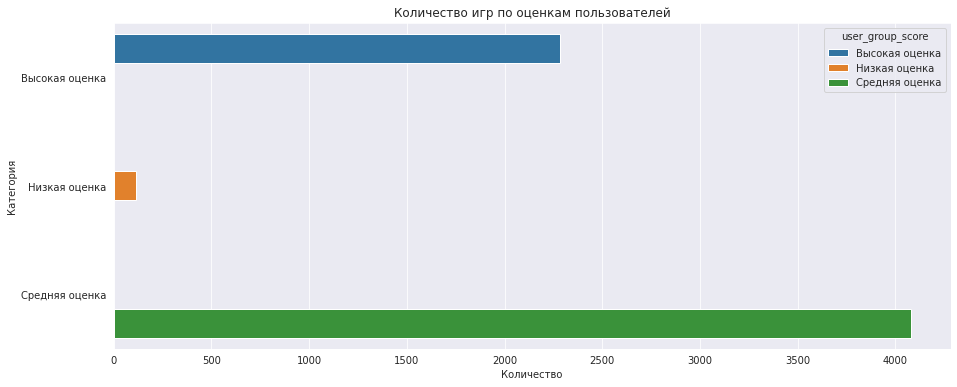

In [38]:
plt.figure(figsize= (15, 6))

sns.set_style('darkgrid')

sns.barplot(data= user_group_score, x= 'name', y= 'user_group_score', hue= 'user_group_score')

plt.title('Количество игр по оценкам пользователей')
plt.xlabel('Количество')
plt.ylabel('Категория')

plt.show()

In [39]:
critic_group_score = df_actual.groupby('critic_group_score')['name'].count().reset_index()

critic_group_score

,critic_group_score,name
0,Высокая оценка,1686
1,Низкая оценка,55
2,Средняя оценка,5421


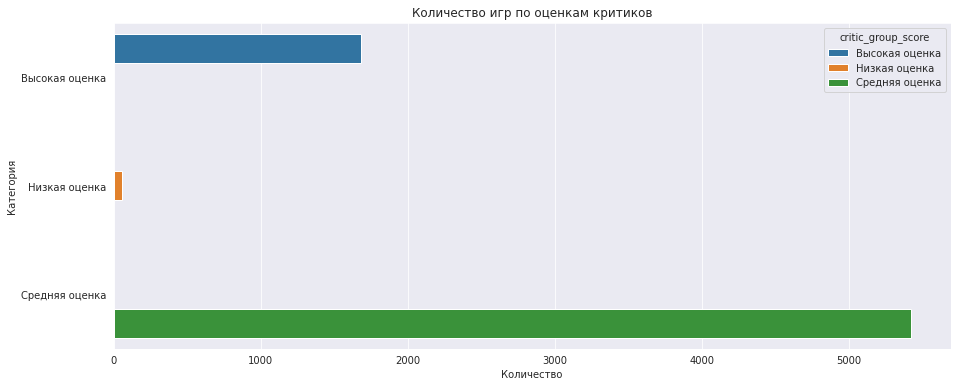

In [40]:
plt.figure(figsize= (15, 6))

sns.set_style('darkgrid')

sns.barplot(data= critic_group_score, x= 'name', y= 'critic_group_score', hue= 'critic_group_score')

plt.title('Количество игр по оценкам критиков')
plt.xlabel('Количество')
plt.ylabel('Категория')

plt.show()

- Выделите топ-7 платформ по количеству игр, выпущенных за весь актуальный период.

In [41]:
platform_top = df_actual.groupby('platform')['name'].count().sort_values(ascending= False).reset_index().head(7)

platform_top

,platform,name
0,PS2,2126
1,DS,2117
2,WII,1275
3,PSP,1179
4,X360,1118
5,PS3,1087
6,GBA,810


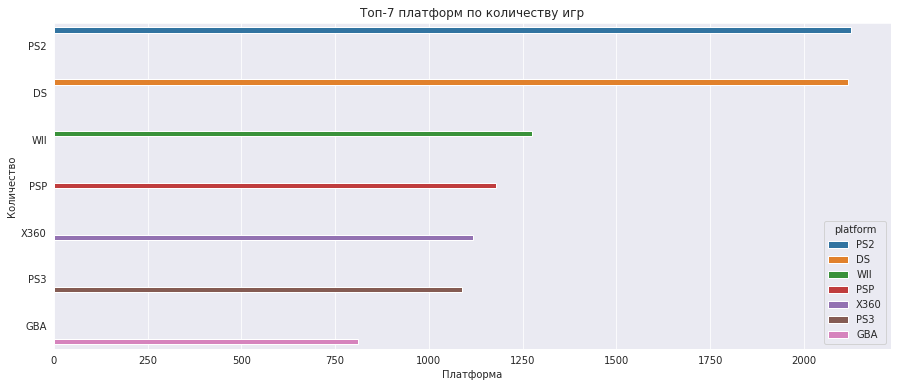

In [42]:
plt.figure(figsize= (15, 6))

sns.set_style('darkgrid')

sns.barplot(data= platform_top, x= 'name', y= 'platform', hue= 'platform')

plt.title('Топ-7 платформ по количеству игр')
plt.xlabel('Платформа')
plt.ylabel('Количество')

plt.show()

---

## 5. Итоговый вывод

В конце напишите основной вывод и отразите, какую работу проделали. Не забудьте указать описание среза данных и новых полей, которые добавили в исходный датасет.

<font color='#777778'>  
В процессе подготовки данных, удаляли данные, например строки с пропусками или ошибками, дубликаты и прочее. Мы создали новый датафрейм df_actual, который содержит данные по играм за период с 2000 по 2013 год. 

- Очистка данных: Удалено 522 строки (примерно 3,08%) из-за несоответствия требованиям качества, таких как наличие пропусков, ошибок и дубликатов.
- Приведение к единому формату: Все значения были переведены в нижний регистр для устранения проблем с регистрами символов.
- Работа с пропусками: Пропуски в столбце рейтинга заменены специальными индикаторами-заглушками. Остальные удалены, принято решение, что это не повлияет на задачу.
- Улучшение структуры: Колонки переименованы согласно общепринятым стандартам, что повысило читаемость и удобство работы с данными.

Добавление новых полей:
- user_group_score: Категоризация оценки пользователей по трём уровням: Высокая, Средняя, Низкая.
- critic_group_score: Аналогичная категоризация оценки критиков.

- Определение основных платформ: Проведён анализ по количеству выпущенных игр за период с 2000 по 2013 годы, определены топ-7 платформ.

Основной вывод заключается в том, что после тщательной предобработки данных исходный датасет стал значительно чище и удобнее для дальнейшего анализа. Несмотря на удаление небольшого количества строк (около 3%), данные сохранили свою репрезентативность и структурированность. Это позволило сформировать новые категории для анализа, такие как оценка пользователей и критиков, а также провести срез данных по основным игровым платформам</font>